In [2]:
import pandas as pd
import numpy as np

import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'
train_file = 'round1_ijcai_18_train_20180301.txt'

data = pd.read_csv(wd+train_file, sep=' ')

In [3]:
data.columns

Index(['instance_id', 'item_id', 'item_category_list', 'item_property_list',
       'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade'],
      dtype='object')

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
count,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,478138.000000,478138.00000,478138.000000,478138.000000,4.781380e+05,478138.000000,...,4.781380e+05,478138.000000,4.781380e+05,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000
mean,4.613082e+18,4.594622e+18,4.838444e+18,5.500420e+18,6.777175,11.13384,12.199336,17.128676,4.609864e+18,0.213047,...,1.537502e+09,4003.362366,4.733842e+18,15.768353,0.994830,5013.175240,0.971124,0.970497,0.974863,0.018867
std,2.663448e+18,2.710140e+18,2.694756e+18,2.464881e+18,1.089037,2.58886,2.497312,2.160745,2.663355e+18,0.514699,...,1.726222e+05,4.019709,2.596118e+18,2.825294,0.011972,2.590989,0.023817,0.023776,0.025024,0.136055
min,3.823219e+12,6.964907e+14,-1.000000e+00,-1.000000e+00,0.000000,-1.00000,0.000000,0.000000,2.477979e+13,-1.000000,...,1.537200e+09,4001.000000,1.543560e+15,0.000000,-1.000000,4999.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.308543e+18,2.251088e+18,2.357806e+18,3.948283e+18,6.000000,10.00000,11.000000,16.000000,2.302761e+18,0.000000,...,1.537351e+09,4001.000000,2.498543e+18,14.000000,0.992779,5012.000000,0.966360,0.965684,0.969268,0.000000
50%,4.613478e+18,4.636270e+18,5.051040e+18,6.738284e+18,7.000000,11.00000,12.000000,17.000000,4.608490e+18,0.000000,...,1.537506e+09,4001.000000,4.629590e+18,16.000000,1.000000,5013.000000,0.972347,0.971590,0.978493,0.000000
75%,6.920994e+18,7.007158e+18,7.565625e+18,7.534239e+18,8.000000,13.00000,14.000000,19.000000,6.914375e+18,0.000000,...,1.537635e+09,4004.000000,6.740687e+18,17.000000,1.000000,5015.000000,0.977822,0.976978,0.983640,0.000000
max,9.223362e+18,9.221980e+18,9.222396e+18,9.151271e+18,17.000000,17.00000,17.000000,21.000000,9.223345e+18,2.000000,...,1.537805e+09,4020.000000,9.220773e+18,25.000000,1.000000,5020.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
def timestamp_datetime(timestamp):
    return time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(timestamp))

data['realtime'] = data['context_timestamp'].apply(timestamp_datetime)
data['realtime'] = pd.to_datetime(data['realtime'])
data['day'] = data['realtime'].dt.day
data['hour'] = data['realtime'].dt.hour

In [20]:
def target_variable(target, variable, data):
    sns.pointplot(x=variable, y=target, data=data, figsize=(8, 7))
    plt.ylabel(target, fontsize=12)
    plt.xlabel(variable, fontsize=12)
    plt.xticks(rotation='vertical')
    plt.show()

target = 'is_trade'
drop_list = ['instance_id', 'is_trade',
             'item_id', 'item_category_list', 'item_property_list', 'item_brand_id', 'item_city_id',
             'user_id', 
             'context_id', 'predict_category_property', 'context_timestamp', 'realtime',
             'shop_id', 'shop_review_positive_rate', 'shop_score_service', 'shop_score_delivery', 'shop_score_description']
plt_list = [x for x in data.columns if x not in drop_list]

---------- item_price_level ----------


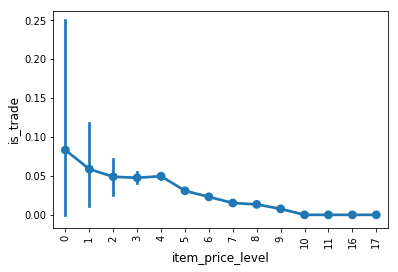

---------- item_sales_level ----------


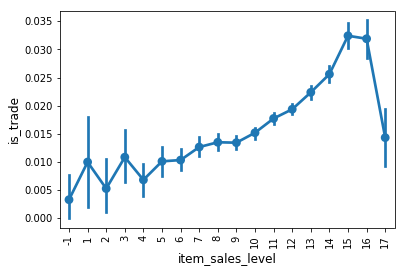

---------- item_collected_level ----------


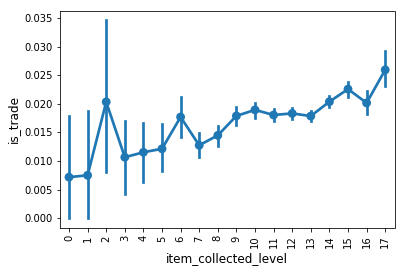

---------- item_pv_level ----------


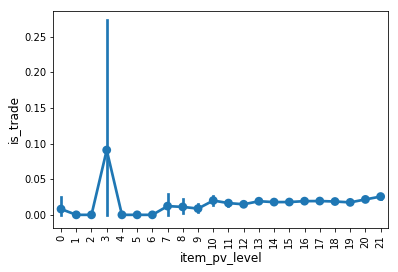

---------- user_gender_id ----------


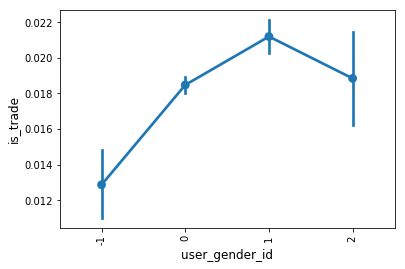

---------- user_age_level ----------


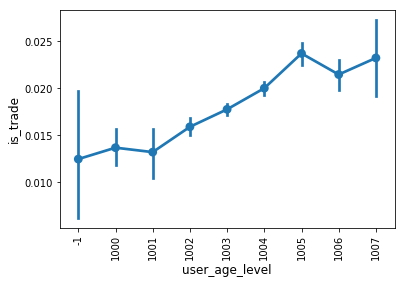

---------- user_occupation_id ----------


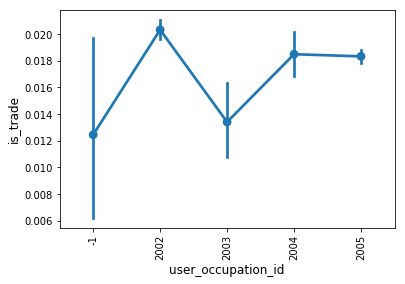

---------- user_star_level ----------


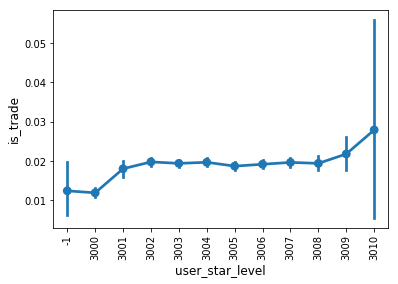

---------- context_page_id ----------


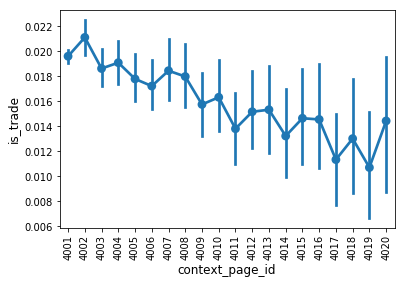

---------- shop_review_num_level ----------


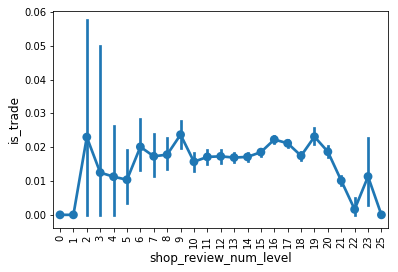

---------- shop_star_level ----------


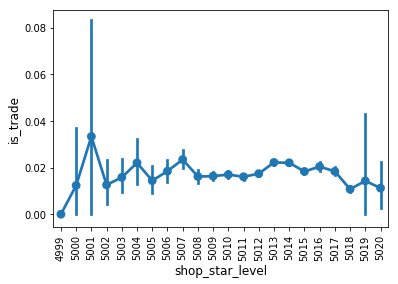

---------- day ----------


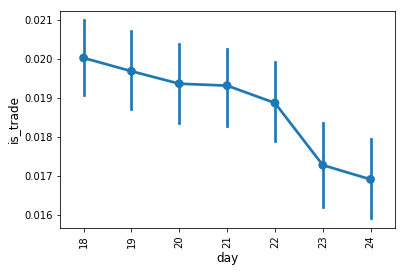

---------- hour ----------


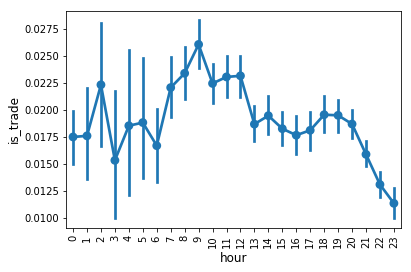

In [21]:
for var in plt_list:
    print('-'*10, var, '-'*10)
    target_variable(target, var, data)

In [ ]:
print('preprocessing...')
LabelEncoder = preprocessing.LabelEncoder()

# item
data['len_item_category'] = data['item_category_list'].map(lambda x: len(str(x).split(';')))
data['len_item_property'] = data['item_property_list'].map(lambda x: len(str(x).split(';')))

for i in range(1, 3):   # item_category_list的第0列全部都一样
    data['item_category_list' + str(i)] = LabelEncoder.fit_transform(data['item_category_list'].map(lambda x: str(str(x).split(';')[i]) if len(str(x).split(';')) > i else ''))
for i in range(10):
    data['item_property_list' + str(i)] = LabelEncoder.fit_transform(data['item_property_list'].map(lambda x: str(str(x).split(';')[i]) if len(str(x).split(';')) > i else ''))
for col in ['item_id', 'item_brand_id', 'item_city_id']:
    data[col] = LabelEncoder.fit_transform(data[col])

# user
for col in ['user_id']:
    data[col] = LabelEncoder.fit_transform(data[col])
data['gender0'] = data['user_gender_id'].apply(lambda x: 1 if x == -1 else 2)
data['age0'] = data['user_age_level'].apply(lambda x: 1 if x == 1004 | x == 1005 | x == 1006 | x == 1007 else 2)
data['occupation0'] = data['user_occupation_id'].apply(lambda x: 1 if x == -1 | x == 2003 else 2)
data['star0'] = data['user_star_level'].apply(lambda x: 1 if x == -1 | x == 3000 | x == 3001 else 2)

# context
data['realtime'] = data['context_timestamp'].apply(timestamp_datetime)
data['realtime'] = pd.to_datetime(data['realtime'])
data['day'] = data['realtime'].dt.day
data['hour'] = data['realtime'].dt.hour
data['len_predict_category_property'] = data['predict_category_property'].map(lambda x: len(str(x).split(';')))
for i in range(5):
    data['predict_category_property' + str(i)] = LabelEncoder.fit_transform(data['predict_category_property'].map(lambda x: str(str(x).split(';')[i]) if len(str(x).split(';')) > i else ''))
data['context_page0'] = data['context_page_id'].apply(lambda x: 1 if x == 4001 | x == 4002 | x == 4003 | x == 4004 | x == 4007 else 2)

# shop
for col in ['shop_id']:
    data[col] = LabelEncoder.fit_transform(data[col])
data['shop_score_delivery0'] = data['shop_score_delivery'].apply(lambda x: 0 if x <= 0.98 and x >= 0.96 else 1)

In [22]:
LabelEncoder = preprocessing.LabelEncoder()

# item
data['len_item_category'] = data['item_category_list'].map(lambda x: len(str(x).split(';')))
data['len_item_property'] = data['item_property_list'].map(lambda x: len(str(x).split(';')))

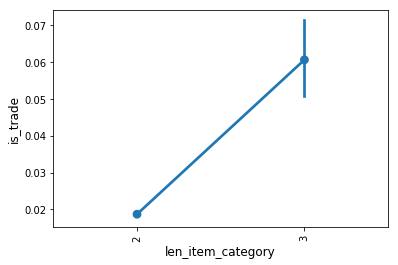

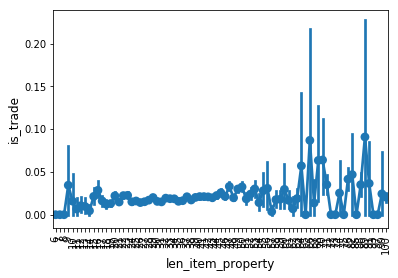

In [27]:
target_variable(target, variable='len_item_category', data=data)
target_variable(target, variable='len_item_property', data=data)

In [28]:
for i in range(1, 3):   # item_category_list的第0列全部都一样
    data['item_category_list' + str(i)] = LabelEncoder.fit_transform(data['item_category_list'].map(lambda x: str(str(x).split(';')[i]) if len(str(x).split(';')) > i else ''))

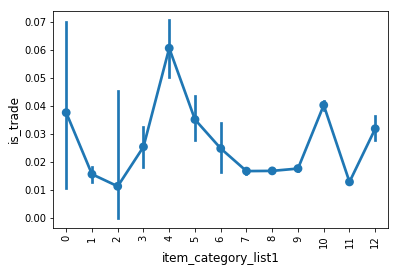

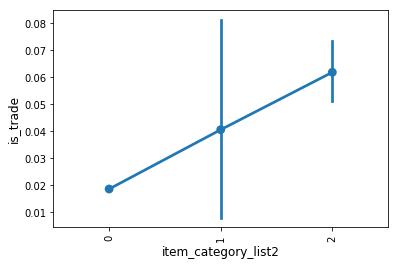

In [31]:
for i in range(1, 3):
    target_variable(target, variable='item_category_list' + str(i), data=data)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

count_vec = TfidfVectorizer()
data_ip = count_vec.fit_transform(data['item_property_list'])

In [34]:
type(data_ip)

scipy.sparse.csr.csr_matrix